In [1]:
########################################################
# Sites:
# 1 = Sandnes
# 2 = Iffiartafik
# 3 = Qoornoq
# 4 = Ersaa
# 5 = Kangeq
# 6 = all
# 7 = all_separate
#
# Types:
# Natural = 1
# Cultural = 2
# both = 3
#
# Variables:
# NB: to use log(variable) add 0.1 to variable number
# 1 = soil water content
# 2 = pH
# 6 = Soil weight
# 7 = Remaining soil after sifting
# 8 = waste by sifting
# 10 = Roots < 1mm (dry)
# 11 = Roots > 1mm (dry)
# 12 = Horse tail (dry)
# 13 = Roots < 1mm (dry) /kg dry soil
# 14 = Roots > 1mm (dry) /kg dry soil
# 15 = Horse tail (dry) /kg dry soil
# 20 = Total biomass
# 21 = NDVI handheld
# 22 = LAI
# 30 = Phosphor concentration in analysis
# 31 = Phosphor/kg dry soil
# 32 = Phosphor/kg dry soil - blank corrected
# 40 = NO3 concentration in analysis
# 41 = NH4 concentration in analysis
# 42 = TOC concentration in analysis
# 43 = TN concentration in analysis
# 44 = DON concentration in analysis
# 45 = NO3 in dry soil, blank corrected
# 46 = NH4 in dry soil, blank corrected
# 47 = TN in dry soil, blank corrected (Total nitrogen)
# 48 = DON in dry soil, blank corrected (Dissolved organic nitrogen, eg. aminosyrer)
# 49 = TOC in dry soil, blank corrected (Total organic carbon)

# plot modes:
# 1 = all plots

# 2 = pool natural/cultural plots together and plot mean
# 2.1 = add std as error plot
# 2.2 = add std as shaded area

# 3 = Scatter plot

# 4 = Scatter plot mean
# 4.1 = add std error bar on y-axis
# 4.2 = add std error bar on x-axis
# 4.3 = add std error bar on both axes

#########################################################

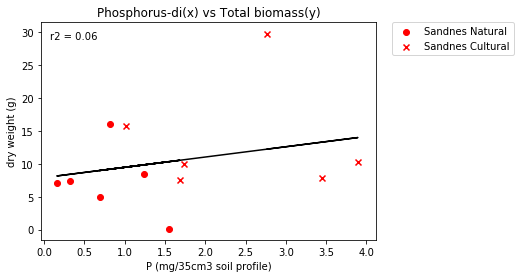

In [11]:
from plotfunctions import *
%matplotlib inline

inFile = '/Users/rasmus/Google Drive/Phd/Field work 2016/Lab_sheet_v9.35.xlsx'
sites = 1
types = 3
variable_1 = 36
variable_2 = 20
plotmode = 3
reg = True
#savefig = '/Users/rasmus/Google Drive/Phd/Field work 2016/figures'
#savefig = '/Users/rasmus/Desktop/temp'
savefig = None

################
if sites == 7:
    for num in range(1,7):
        plot(inFile, num, types, variable_1, variable_2, plotmode, reg, savefig)
else:
    plot(inFile, sites, types, variable_1, variable_2, plotmode, reg, savefig)

In [76]:
# t-test cultural vs natural
from plotfunctions import *
inFile = '/Users/rasmus/Google Drive/Phd/Field work 2016/Lab_sheet_v9.35.xlsx'
sites = 1
variable = 36
pooldata = True
savetxt = '/Users/rasmus/Google Drive/Phd/Field work 2016/figures/t-test/cultural vs natural'

################
if sites == 7:
    for num in range(1,6):
        ttest_stype(inFile, num, variable, pooldata, savetxt, printtxt=False)
else:
    ttest_stype(inFile, sites, variable, pooldata, printtxt=True)



Sandnes
Natural vs Cultural
pooled: 	t = -3.20657  	p = 0.01462 	significant


In [11]:
# t-test site1 vs site2
from plotfunctions import *
inFile = '/Users/rasmus/Google Drive/Phd/Field work 2016/Lab_sheet_v9.34.xlsx'
site1 = 7
site2 = 7
stype = 1
variable = 49
pooldata = True
savetxt = '/Users/rasmus/Google Drive/Phd/Field work 2016/figures/t-test/site vs site'

################
if site1 <= 5 and site2 == 7:
    for site2 in range(1,6):
        ttest_site(inFile, site1, site2, stype, variable, pooldata, savetxt, printtxt=False)
        
elif site1 == 7 and site2 == 7:
    for site1 in range(1,6):
        for site2 in range(1,6):
            ttest_site(inFile, site1, site2, 1, variable, pooldata, savetxt, printtxt=False)
    for site1 in range(1,6):
        for site2 in range(1,6):
            ttest_site(inFile, site1, site2, 2, variable, pooldata, savetxt, printtxt=False)
else:
    ttest_site(inFile, site1, site2, stype, variable, pooldata, printtxt=True)

Text-file created: /Users/rasmus/Google Drive/Phd/Field work 2016/figures/t-test/site vs site/TOC-DW soil_t-test_site_vs_site_pooled.txt


In [6]:
# add plots to pdf-file (all sites)
from plotfunctions import *

variable = 1
plotmode = 2.2
inFolder = '/Users/rasmus/Google Drive/Phd/Field work 2016/figures'
outFolder = '/Users/rasmus/Google Drive/Phd/Field work 2016/figures/pdf/mean'

plot2pdf_allsites(variable, plotmode, inFolder, outFolder)

PDF-file created: /Users/rasmus/Google Drive/Phd/Field work 2016/figures/pdf/mean/Water content all sites.pdf


In [23]:
# add plots to pdf-file (1 site, 1 variable group)
# variable groups:
vgroup1 = [30,31,32] # phosporus
vgroup2 = [45,46,47,48,49,32] # nutrients
vgroup3 = [10,11,12,13,14,15] # roots

from plotfunctions import *

sites = 5
variableList = vgroup3
plotname = 'Roots'
plotmode = 2.2
inFolder = '/Users/rasmus/Google Drive/Phd/Field work 2016/figures'
outFolder = '/Users/rasmus/Google Drive/Phd/Field work 2016/figures/pdf/mean'

plot2pdf_onesite(sites, variableList, plotmode, inFolder, outFolder, plotname)

PDF-file created: /Users/rasmus/Google Drive/Phd/Field work 2016/figures/pdf/mean/Roots Kangeq.pdf


In [14]:
from plotfunctions import *
from scipy.stats import ttest_ind
inFile = '/Users/rasmus/Google Drive/Phd/Field work 2016/Lab_sheet_v9.34.xlsx'
sites = 2
sitetypes = 3
variable = 32
plotmode = 4

dataList = getdata(inFile, variable, sites, sitetypes, plotmode)
a = dataList[0].observation[~np.isnan(dataList[0].observation)]
b = dataList[1].observation[~np.isnan(dataList[1].observation)]
t, p = ttest_ind(dataList[0].observation, dataList[1].observation, equal_var=False)
t, p = ttest_ind(a, b, equal_var=False)